## HOJA DE TRABAJO 2

In [33]:
import pandas as pd
from ydata_profiling import ProfileReport     # para versiones Python >= 3.11
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator 


In [34]:
datos = pd.read_csv("iris.csv")

Recuerdos de codigo base

In [35]:
#Primeros 0 datos 
datos.head()
#Info basica de datos, count, media, desviacion, min, percentiles y max
datos.describe()
# tipo de datos, conteo de no null por columnta
datos.info()
# Filas, columnas
datos.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


(150, 4)

### Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la forma del sépalo

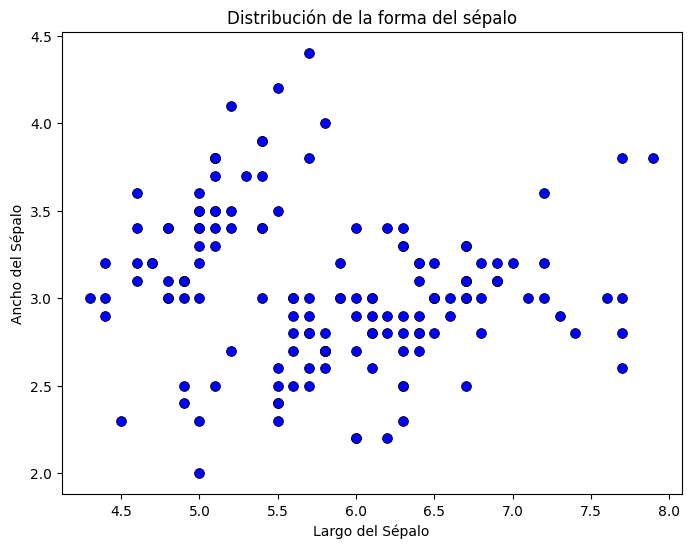

In [36]:
# define datasource para el scatterplot y tamaño del display
datasource = pd.DataFrame(datos, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
plt.figure(figsize=(8,6))
# crea el scatterplot con data, ejes, tamaño de puntos, colores puntos, y color bordes
sns.scatterplot(data = datasource,  x="sepal_length", y="sepal_width", s=50, color="blue", edgecolor="black")
# Etiquetas
plt.xlabel("Largo del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.title("Distribución de la forma del sépalo")

# Mostrar gráfico
plt.show()

### Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados

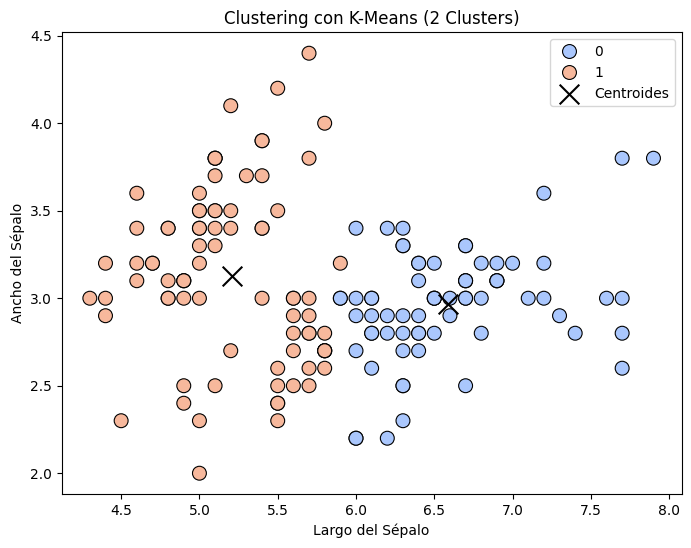

In [37]:
#columnas
x = datasource[["sepal_length", "sepal_width"]]

#Kmeans con 2 clusters
kmeans = KMeans(n_clusters = 2, random_state = 42)
datasource["cluster"] = kmeans.fit_predict(x)

#Visualizacion
plt.figure(figsize=(8,6))
sns.scatterplot(data=datasource, x="sepal_length", y="sepal_width", hue="cluster", palette="coolwarm", s=100, edgecolor="black")

# Graficar los centroides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=200, label="Centroides")

# Etiquetas y título
plt.xlabel("Largo del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.title("Clustering con K-Means (2 Clusters)")
plt.legend()
plt.show()

### Estandaricen los datos y repitan paso 2


   sepal_length  sepal_width  petal_length  petal_width   cluster
0     -0.900681     1.032057     -1.341272    -1.312977  0.922958
1     -1.143017    -0.124958     -1.341272    -1.312977  0.922958
2     -1.385353     0.337848     -1.398138    -1.312977  0.922958
3     -1.506521     0.106445     -1.284407    -1.312977  0.922958
4     -1.021849     1.263460     -1.341272    -1.312977  0.922958


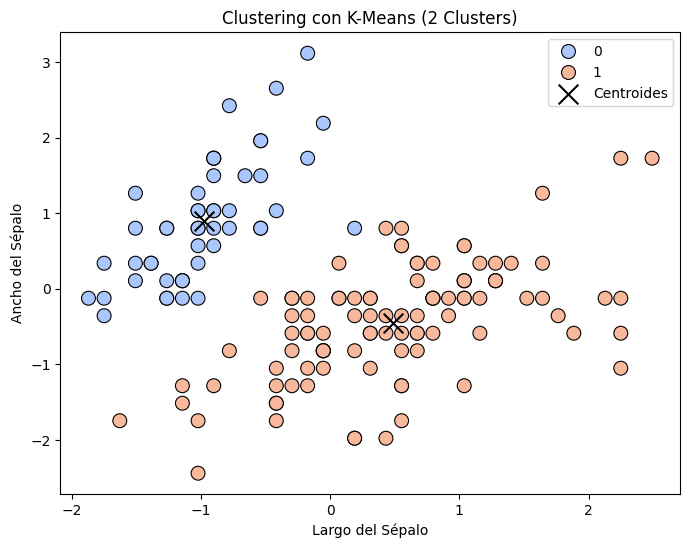

In [38]:


scaler = StandardScaler()
# transform
datos_estandarizados = scaler.fit_transform(datasource)
# df estandarizado 
df_estandarizado = pd.DataFrame(datos_estandarizados, columns=datasource.columns)

# Mostrar los primeros datos estandarizados
print(df_estandarizado.head())


#paso 2 nuevamente
#columnas
x = df_estandarizado[["sepal_length", "sepal_width"]]

#Kmeans con 2 clusters
kmeans = KMeans(n_clusters = 2, random_state = 42)
df_estandarizado["cluster"] = kmeans.fit_predict(x)

#Visualizacion
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_estandarizado, x="sepal_length", y="sepal_width", hue="cluster", palette="coolwarm", s=100, edgecolor="black")

# Graficar los centroides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=200, label="Centroides")

# Etiquetas y título
plt.xlabel("Largo del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.title("Clustering con K-Means (2 Clusters)")
plt.legend()
plt.show()


### Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

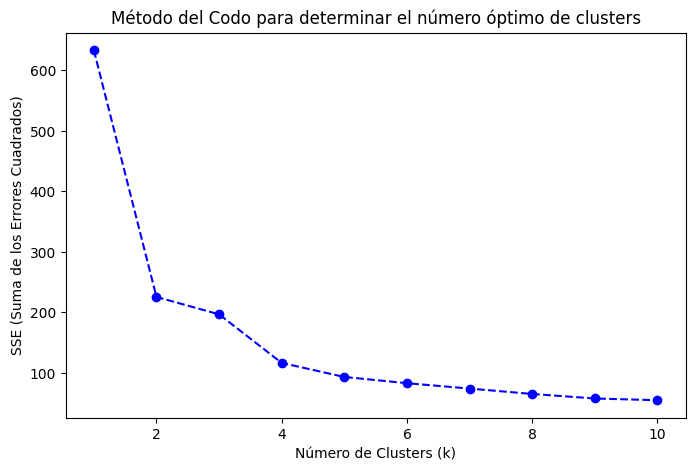

In [39]:

# Lista para almacenar el SSE (suma de los errores cuadrados)
sse = []

# Probar K-Means con diferentes valores de k (clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_estandarizado)
    sse.append(kmeans.inertia_) 

# Graficar el método del codo
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), sse, marker="o", linestyle="--", color="b")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("SSE (Suma de los Errores Cuadrados)")
plt.title("Método del Codo para determinar el número óptimo de clusters")
plt.show()


In [40]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print(f"El número óptimo de clusters es: {kl.elbow}")

k_optimo = kl.elbow  # Número óptimo de clusters
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
clusters = kmeans_final.fit_predict(df_estandarizado)

# Agregar los clusters al DataFrame original
datasource["Cluster"] = clusters


El número óptimo de clusters es: 4


### Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

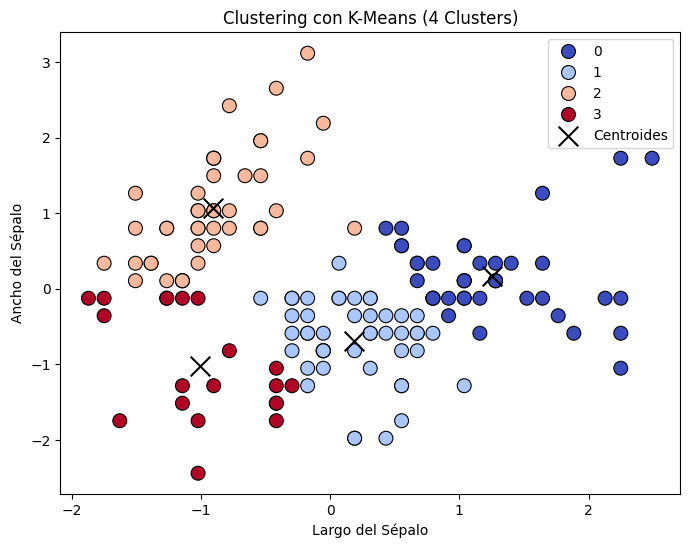

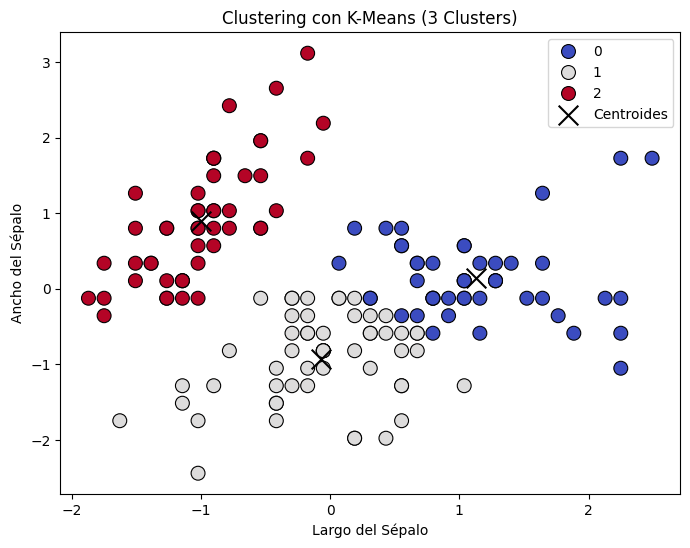

In [41]:
#columnas
x = df_estandarizado[["sepal_length", "sepal_width"]]

#Kmeans con 4 clusters
kmeans = KMeans(n_clusters = 4, random_state = 42)
df_estandarizado["cluster"] = kmeans.fit_predict(x)

#Visualizacion
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_estandarizado, x="sepal_length", y="sepal_width", hue="cluster", palette="coolwarm", s=100, edgecolor="black")

# Graficar los centroides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=200, label="Centroides")

# Etiquetas y título
plt.xlabel("Largo del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.title("Clustering con K-Means (4 Clusters)")
plt.legend()
plt.show()

#Kmeans con 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 42)
df_estandarizado["cluster"] = kmeans.fit_predict(x)

#Visualizacion
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_estandarizado, x="sepal_length", y="sepal_width", hue="cluster", palette="coolwarm", s=100, edgecolor="black")

# Graficar los centroides
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=200, label="Centroides")

# Etiquetas y título
plt.xlabel("Largo del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.title("Clustering con K-Means (3 Clusters)")
plt.legend()
plt.show()
